In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

C:\Users\User\anaconda3\envs\mlbook\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
DOWNLOAD_ROOT = "http://download.tensorflow.org/data/"
FILENAME = "quickdraw_tutorial_dataset_v1.tar.gz"
filepath = keras.utils.get_file(FILENAME,
                                DOWNLOAD_ROOT + FILENAME,
                                cache_subdir="datasets/quickdraw",
                                extract=True)

In [4]:
from pathlib import Path

In [5]:
quickdraw_dir = Path(filepath).parent

In [6]:
train_files = sorted(str(p) for p in quickdraw_dir.glob("training.tfrecord-*"))
eval_files = sorted(str(p) for p in quickdraw_dir.glob("eval.tfrecord-*"))

In [7]:
type(train_files)

list

In [8]:
print(quickdraw_dir)

C:\Users\User\.keras\datasets\quickdraw


In [9]:
with open(quickdraw_dir / "training.tfrecord.classes") as train_classes_file:
    train_classes = train_classes_file.readlines()

In [10]:
with open(quickdraw_dir / "eval.tfrecord.classes") as test_classes_file:
    test_classes = test_classes_file.readlines()

In [11]:
test_classes

['garden hose\n',
 'lighter\n',
 'penguin\n',
 'tractor\n',
 'sheep\n',
 'skateboard\n',
 'mountain\n',
 'mouse\n',
 'chandelier\n',
 'guitar\n',
 'roller coaster\n',
 'owl\n',
 'toilet\n',
 'map\n',
 'snail\n',
 'yoga\n',
 'spoon\n',
 'camera\n',
 'telephone\n',
 'bench\n',
 'pig\n',
 'lion\n',
 'skull\n',
 'hand\n',
 'raccoon\n',
 'beard\n',
 'church\n',
 'animal migration\n',
 'whale\n',
 'sun\n',
 'washing machine\n',
 'airplane\n',
 'megaphone\n',
 'sleeping bag\n',
 'jail\n',
 'fire hydrant\n',
 'car\n',
 'barn\n',
 'swing set\n',
 'rake\n',
 'paintbrush\n',
 'van\n',
 'dragon\n',
 'sailboat\n',
 'compass\n',
 'duck\n',
 'hat\n',
 'kangaroo\n',
 'donut\n',
 'crocodile\n',
 'coffee cup\n',
 'cooler\n',
 'waterslide\n',
 'feather\n',
 'firetruck\n',
 'stereo\n',
 'leg\n',
 'tree\n',
 'pillow\n',
 'purse\n',
 'hourglass\n',
 'ear\n',
 'broccoli\n',
 'goatee\n',
 'moon\n',
 'bridge\n',
 'peas\n',
 'squiggle\n',
 'foot\n',
 'camouflage\n',
 'string bean\n',
 'pants\n',
 'lipstick\n',


In [12]:
train_classes

['garden hose\n',
 'lighter\n',
 'penguin\n',
 'tractor\n',
 'sheep\n',
 'skateboard\n',
 'mountain\n',
 'mouse\n',
 'chandelier\n',
 'guitar\n',
 'roller coaster\n',
 'owl\n',
 'toilet\n',
 'map\n',
 'snail\n',
 'yoga\n',
 'spoon\n',
 'camera\n',
 'telephone\n',
 'bench\n',
 'pig\n',
 'lion\n',
 'skull\n',
 'hand\n',
 'raccoon\n',
 'beard\n',
 'church\n',
 'animal migration\n',
 'whale\n',
 'sun\n',
 'washing machine\n',
 'airplane\n',
 'megaphone\n',
 'sleeping bag\n',
 'jail\n',
 'fire hydrant\n',
 'car\n',
 'barn\n',
 'swing set\n',
 'rake\n',
 'paintbrush\n',
 'van\n',
 'dragon\n',
 'sailboat\n',
 'compass\n',
 'duck\n',
 'hat\n',
 'kangaroo\n',
 'donut\n',
 'crocodile\n',
 'coffee cup\n',
 'cooler\n',
 'waterslide\n',
 'feather\n',
 'firetruck\n',
 'stereo\n',
 'leg\n',
 'tree\n',
 'pillow\n',
 'purse\n',
 'hourglass\n',
 'ear\n',
 'broccoli\n',
 'goatee\n',
 'moon\n',
 'bridge\n',
 'peas\n',
 'squiggle\n',
 'foot\n',
 'camouflage\n',
 'string bean\n',
 'pants\n',
 'lipstick\n',


In [13]:
assert train_classes == test_classes

In [14]:
class_names = [name.strip().lower() for name in train_classes]

In [15]:
sorted(class_names)

['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm',
 'asparagus',
 'axe',
 'backpack',
 'banana',
 'bandage',
 'barn',
 'baseball',
 'baseball bat',
 'basket',
 'basketball',
 'bat',
 'bathtub',
 'beach',
 'bear',
 'beard',
 'bed',
 'bee',
 'belt',
 'bench',
 'bicycle',
 'binoculars',
 'bird',
 'birthday cake',
 'blackberry',
 'blueberry',
 'book',
 'boomerang',
 'bottlecap',
 'bowtie',
 'bracelet',
 'brain',
 'bread',
 'bridge',
 'broccoli',
 'broom',
 'bucket',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cactus',
 'cake',
 'calculator',
 'calendar',
 'camel',
 'camera',
 'camouflage',
 'campfire',
 'candle',
 'cannon',
 'canoe',
 'car',
 'carrot',
 'castle',
 'cat',
 'ceiling fan',
 'cell phone',
 'cello',
 'chair',
 'chandelier',
 'church',
 'circle',
 'clarinet',
 'clock',
 'cloud',
 'coffee cup',
 'compass',
 'computer',
 'cookie',
 'cooler',
 'couch',
 'cow',
 'crab',
 'crayon',
 'crocodile',
 'crow

In [26]:
def parse(data_batch):
    feature_descriptions={
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    examples = tf.io.parse_example(data_batch, feature_descriptions)
    flat_sketches = tf.sparse.to_dense(examples["ink"])
    sketches = tf.reshape(flat_sketches, shape=[tf.size(data_batch), -1, 3])
    lenghts = examples["shape"][:, 0]
    labels = examples["class_index"][:, 0]
    return sketches, lenghts, labels

In [27]:
raw_dataset = tf.data.TFRecordDataset(train_files[0])
for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)


features {
  feature {
    key: "class_index"
    value {
      int64_list {
        value: 0
      }
    }
  }
  feature {
    key: "ink"
    value {
      float_list {
        value: 0.019685029983520508
        value: 0.05095541477203369
        value: 0.0
        value: 0.03149610757827759
        value: 0.03184711933135986
        value: 0.0
        value: 0.12204724550247192
        value: -0.012738823890686035
        value: 0.0
        value: 0.06692910194396973
        value: -0.05095541477203369
        value: 0.0
        value: -0.015748023986816406
        value: -0.13375797867774963
        value: 0.0
        value: -0.0551181435585022
        value: -0.17834395170211792
        value: 0.0
        value: -0.04724407196044922
        value: -0.04458598792552948
        value: 0.0
        value: -0.04330706596374512
        value: -0.006369426846504211
        value: 0.0
        value: -0.0590551495552063
        value: 0.05095541477203369
        value: 0.0
        value: -

In [30]:
def quickdraw_dataset(filepaths, batch_size=32, shuffle_buffer_size=None, n_parse_threads=5, n_read_threads=5, cache=False):
    dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=n_read_threads)
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(parse, num_parallel_calls=n_parse_threads)
    return dataset.prefetch(1)

In [31]:
train_set = quickdraw_dataset(train_files, shuffle_buffer_size=10000)
valid_set = quickdraw_dataset(eval_files[:5])
test_set = quickdraw_dataset(eval_files[5:])

In [32]:
for sketches, lengths, labels in train_set.take(1):
    print("sketches =", sketches)
    print("lengths =", lengths)
    print("labels =", labels)

sketches = tf.Tensor(
[[[-0.16141732  0.00483093  0.        ]
  [-0.08661418  0.03381643  0.        ]
  [-0.00787402  0.07729468  0.        ]
  ...
  [-0.08267716 -0.00483096  1.        ]
  [ 0.26771653 -0.44444442  0.        ]
  [ 0.11417323 -0.34299517  1.        ]]

 [[ 0.1490196  -0.00505051  0.        ]
  [ 0.05490196  0.02020202  0.        ]
  [ 0.13725492  0.09595959  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.04313725  0.03636366  0.        ]
  [-0.0627451   0.0181818   0.        ]
  [-0.04705883 -0.0090909   0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ...

 [[-0.1372549   0.135       0.        ]
  [-0.06274509  0.08499999  0.        ]
  [-0.03529412  0.27999997  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.    

In [33]:
def crop_long_sketches(dataset, max_length=100):
    return dataset.map(lambda inks, lengths, labels: (inks[:, :max_length], labels))

cropped_train_set = crop_long_sketches(train_set)
cropped_valid_set = crop_long_sketches(valid_set)
cropped_test_set = crop_long_sketches(test_set)

In [34]:
model = keras.models.Sequential([
    keras.layers.Conv1D(32, kernel_size=5, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(64, kernel_size=5, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(128, kernel_size=3, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(len(class_names), activation="softmax")
])

In [35]:
optimizer = keras.optimizers.SGD(learning_rate=1e-2)

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [38]:
history = model.fit(cropped_train_set, epochs=2,
                    validation_data=cropped_valid_set)

Epoch 1/2
107813/107813 [==============================] - 1734s 16ms/step - loss: 3.8257 - accuracy: 0.2111 - val_loss: 2.6921 - val_accuracy: 0.3773
Epoch 2/2
107813/107813 [==============================] - 1743s 16ms/step - loss: 2.3306 - accuracy: 0.4517 - val_loss: 2.0976 - val_accuracy: 0.4990


In [39]:
y_test = np.concatenate([labels for _,_,labels in test_set])
y_probas = model.predict(test_set)
np.mean(keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_probas))

5392/5392 [==============================] - 58s 11ms/step


0.6920094

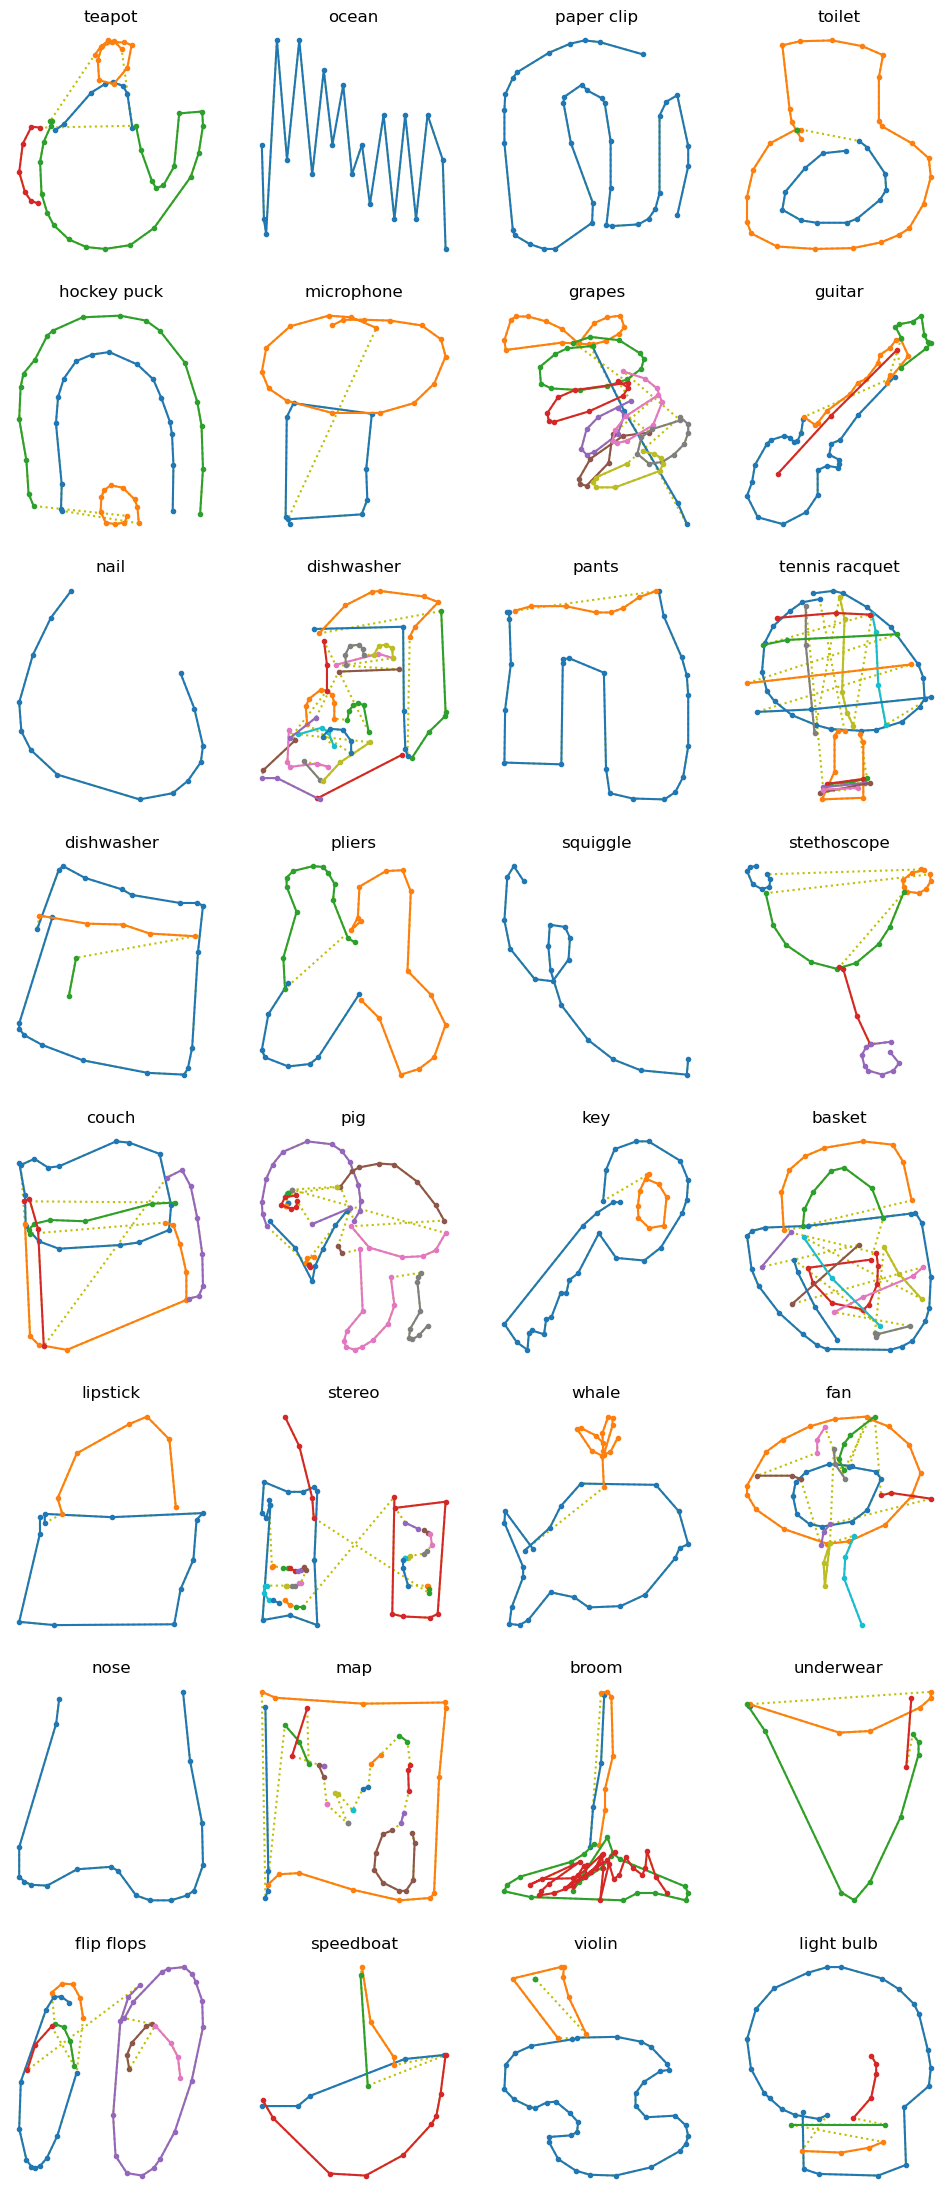

In [40]:
def draw_sketch(sketch, label=None):
    origin = np.array([[0., 0., 0.]])
    sketch = np.r_[origin, sketch]
    stroke_end_indices = np.argwhere(sketch[:, -1]==1.)[:, 0]
    coordinates = np.cumsum(sketch[:, :2], axis=0)
    strokes = np.split(coordinates, stroke_end_indices + 1)
    title = class_names[label.numpy()] if label is not None else "Try to guess"
    plt.title(title)
    plt.plot(coordinates[:, 0], -coordinates[:, 1], "y:")
    for stroke in strokes:
        plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
    plt.axis("off")

def draw_sketches(sketches, lengths, labels):
    n_sketches = len(sketches)
    n_cols = 4
    n_rows = (n_sketches - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 3, n_rows * 3.5))
    for index, sketch, length, label in zip(range(n_sketches), sketches, lengths, labels):
        plt.subplot(n_rows, n_cols, index + 1)
        draw_sketch(sketch[:length], label)
    plt.show()

for sketches, lengths, labels in train_set.take(1):
    draw_sketches(sketches, lengths, labels)
